/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Wine Quality dataset dimensions: (1143, 13)
Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: -7.9303 - accuracy: 0.0000e+00 - val_loss: -17.7767 - val_accuracy: 0.0000e+00
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: -29.4155 - accuracy: 0.0000e+00 - val_loss: -51.6046 - val_accuracy: 0.0000e+00
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: -75.6147 - accuracy: 0.0000e+00 - val_loss: -122.5383 - val_accuracy: 0.0000e+00
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: -168.1650 - accuracy: 0.0000e+00 - val_loss: -25

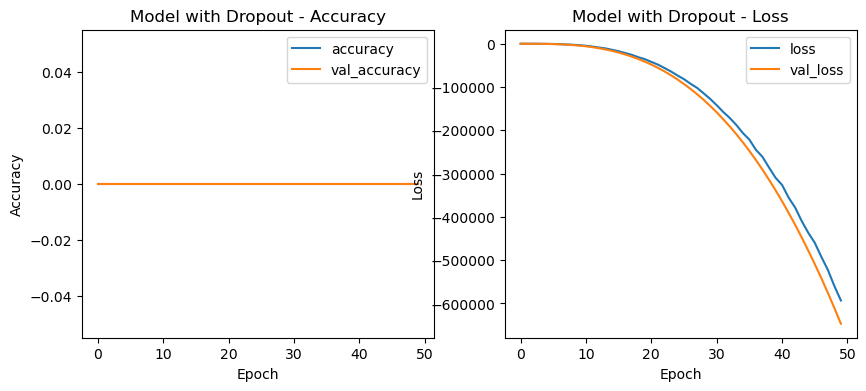

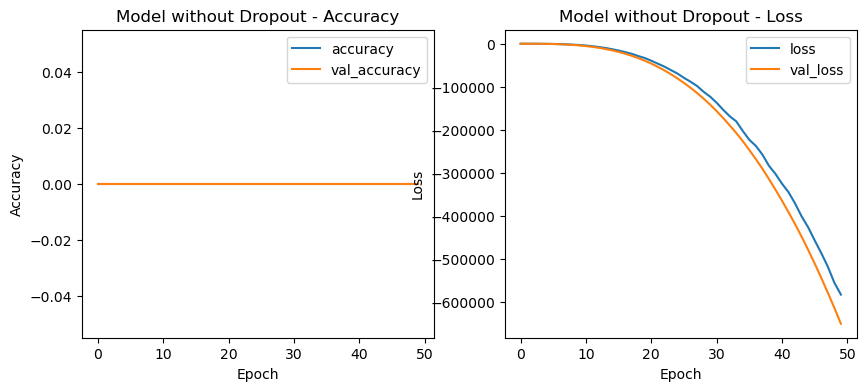

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Wine Quality dataset and explore its dimensions
wine_data = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
print("Wine Quality dataset dimensions:", wine_data.shape)

# Check for null values
print("Null values in the dataset:")
print(wine_data.isnull().sum())

# Identify categorical variables and encode them (if any)
# (If the dataset doesn't have categorical variables, skip this step)

# Separate the features and target variables
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Perform a train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the dataset using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Design and implement the model with Dropout regularization
def create_model_with_dropout():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.5))  # Adding Dropout with 50% probability
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Adding Dropout with 50% probability
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create models with and without Dropout
model_with_dropout = create_model_with_dropout()
model_without_dropout = create_model_with_dropout()

# Compile both models with binary cross-entropy loss and Adam optimizer
model_with_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit both models to the training data
batch_size = 32
epochs = 50

history_with_dropout = model_with_dropout.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_scaled, y_val))
history_without_dropout = model_without_dropout.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_scaled, y_val))

# Evaluate model performance on the test data
accuracy_with_dropout = model_with_dropout.evaluate(X_test_scaled, y_test, verbose=0)[1]
accuracy_without_dropout = model_without_dropout.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"Accuracy with Dropout: {accuracy_with_dropout}")
print(f"Accuracy without Dropout: {accuracy_without_dropout}")

# Plot the training history for both models (accuracy and loss)
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.show()

# Plot training history for both models
plot_history(history_with_dropout, title='Model with Dropout')
plot_history(history_without_dropout, title='Model without Dropout')
